Senaryo
NeuraTech E-Ticaret platformunda, farklı ürün kategorilerindeki satışlar müşteri değerlendirmeleri ve ürünlerin kargo süreleri hakkında verilirimiz var.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [5]:
# Genişletilmiş örnek veri oluşturalım
np.random.seed(42)

veri = {
    'Kategori': np.random.choice(['Elektronik', 'Giyim', 'Ev & Yaşam', 'Kitap'], 1000),
    'Satışlar': np.random.randint(50, 500, 1000),
    'Değerlendirme': np.random.uniform(1, 5, 1000),
    'Kargo Süresi': np.random.randint(1, 10, 1000),  # Kargo süresi (gün)
    'Tarih': [datetime.date(2023, 1, 1) + datetime.timedelta(days=i) for i in range(1000)] # Satış tarihleri
}

df = pd.DataFrame(veri)

/tmp/ipykernel_3776/3509055776.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Kategori', palette='viridis')


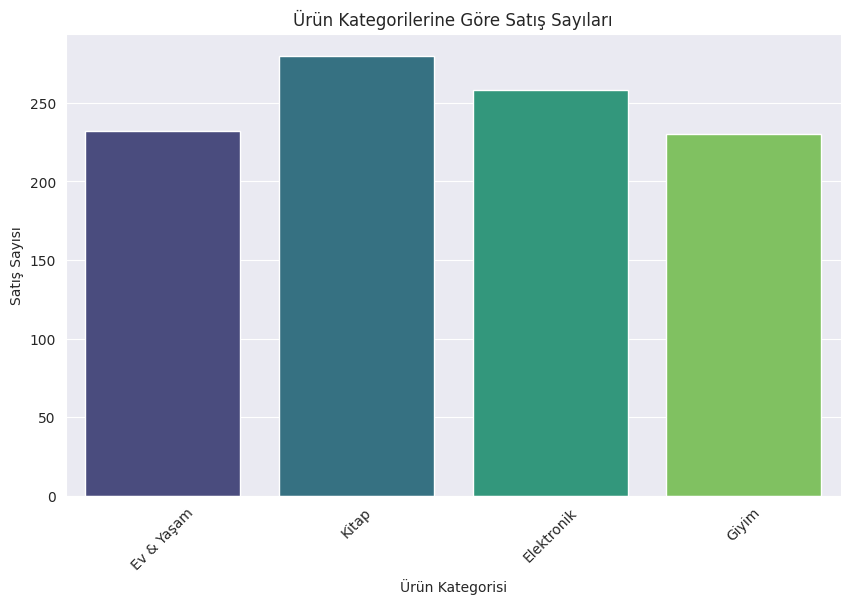

In [6]:
# 1. Hangi ürün kategorisinin daha fazla satış yaptığını görselleştireceğiz.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Kategori', palette='viridis')
plt.title('Ürün Kategorilerine Göre Satış Sayıları')
plt.xlabel('Ürün Kategorisi')
plt.ylabel('Satış Sayısı')
plt.xticks(rotation=45)
plt.show()

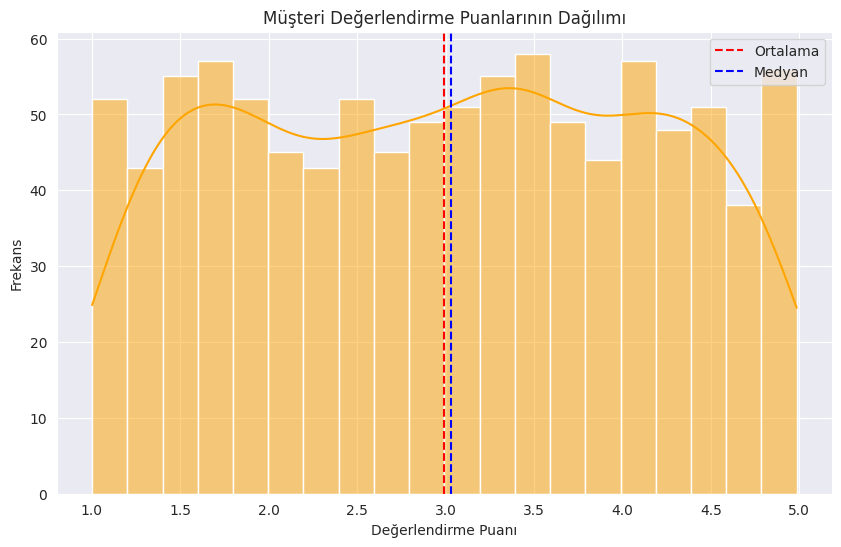

In [7]:
# 2. Müşteri değerlendirme puanlarının dağılımını inceleyeceğiz.
plt.figure(figsize=(10, 6))
sns.histplot(df['Değerlendirme'], bins=20, kde=True, color='orange')
plt.title('Müşteri Değerlendirme Puanlarının Dağılımı')
plt.xlabel('Değerlendirme Puanı')
plt.ylabel('Frekans')
plt.axvline(df['Değerlendirme'].mean(), color='red', linestyle='--', label='Ortalama')
plt.axvline(df['Değerlendirme'].median(), color='blue', linestyle='--', label='Medyan')
plt.legend()
plt.show()

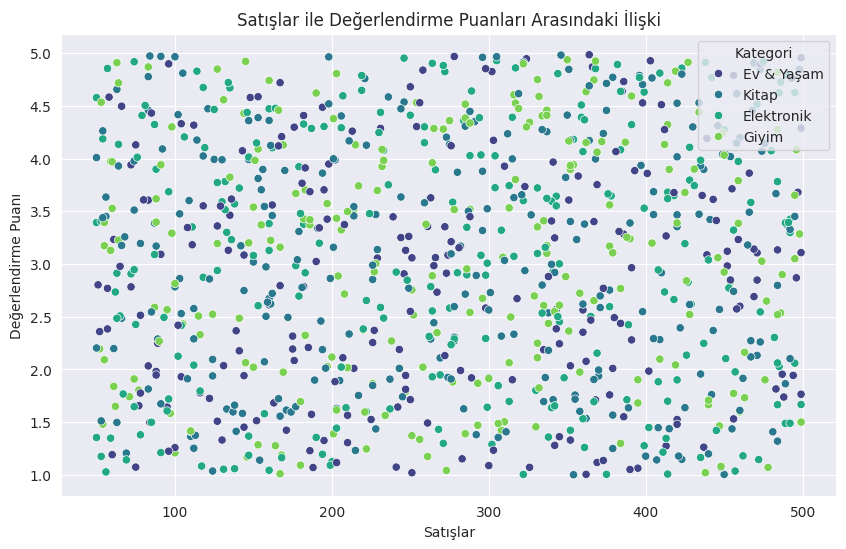

In [8]:
# 3. Satıilar ile değerlendirme puanları arasında bir ilişki olup olmadığını araştıracağız.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Satışlar', y='Değerlendirme', hue='Kategori', palette='viridis')
plt.title('Satışlar ile Değerlendirme Puanları Arasındaki İlişki')
plt.xlabel('Satışlar')
plt.ylabel('Değerlendirme Puanı')
plt.legend(title='Kategori')
plt.show()

/tmp/ipykernel_3776/3328376174.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Kargo Süresi', y='Satışlar', palette='viridis')


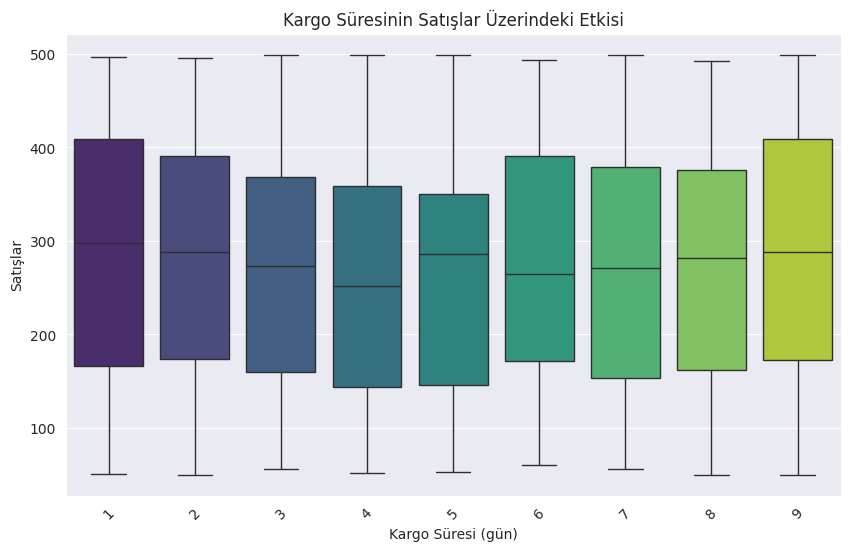

In [9]:
# 4. Kargo süresinin satışlar üzerindeki etkisini inceleyeğiz.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Kargo Süresi', y='Satışlar', palette='viridis')
plt.title('Kargo Süresinin Satışlar Üzerindeki Etkisi')
plt.xlabel('Kargo Süresi (gün)')
plt.ylabel('Satışlar')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_3776/2475509550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Kategori', y='Değerlendirme', palette='viridis')


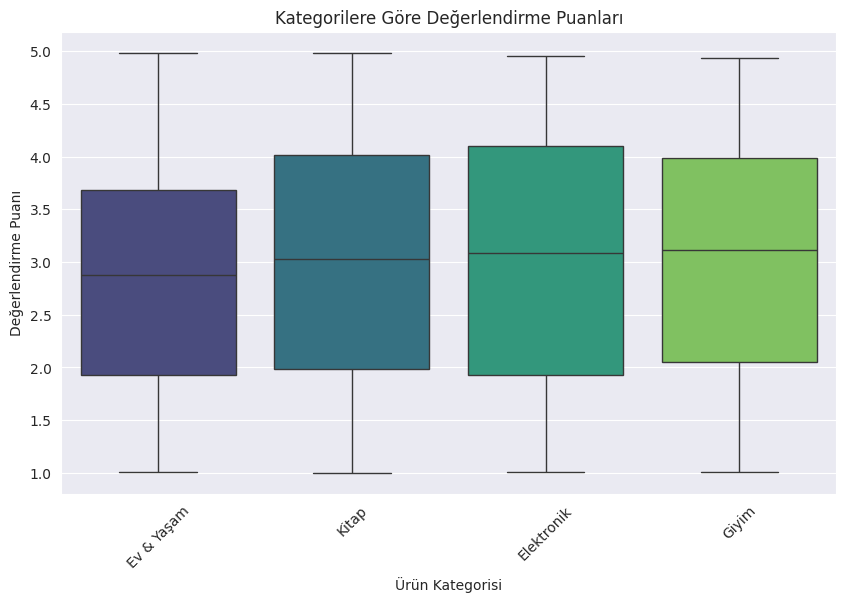

In [10]:
# 5. Kategorilere göre değerlendirme puanlarının karşılaştırmasnı yapacağız.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Kategori', y='Değerlendirme', palette='viridis')
plt.title('Kategorilere Göre Değerlendirme Puanları')
plt.xlabel('Ürün Kategorisi')
plt.ylabel('Değerlendirme Puanı')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_3776/424962121.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  aylik_toplam = df.resample('M').sum()


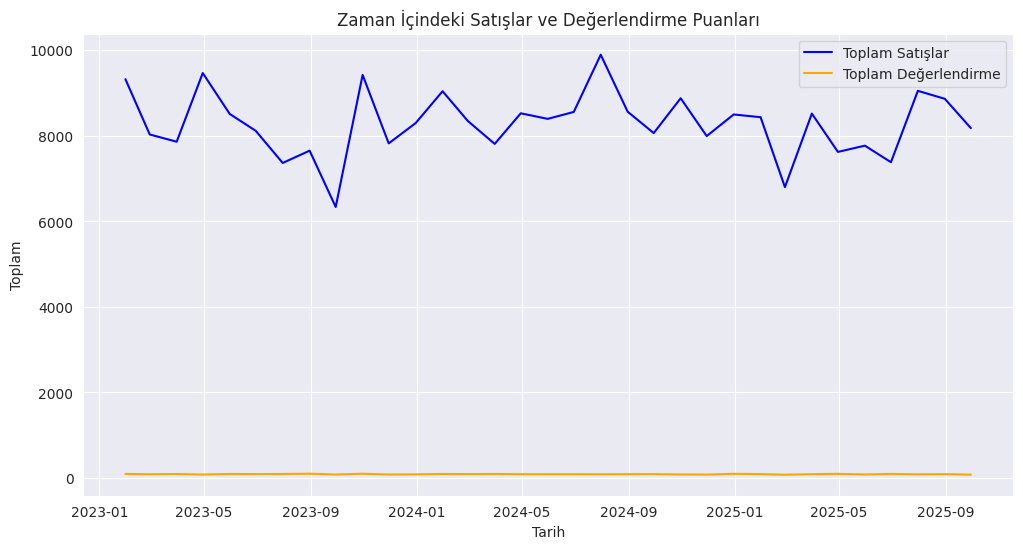

In [11]:
# 6. Satışların ve değerlendirme puanlarnın zaman içindeki değişimini inceleyeceğiz ( ek veri varsayılarak ).
df['Tarih'] = pd.to_datetime(df['Tarih'])
df.set_index('Tarih', inplace=True)
# Aylık toplam satışları hesaplayalım
aylik_toplam = df.resample('M').sum()
plt.figure(figsize=(12, 6))
sns.lineplot(data=aylik_toplam, x=aylik_toplam.index, y='Satışlar', label='Toplam Satışlar', color='blue')
sns.lineplot(data=aylik_toplam, x=aylik_toplam.index, y='Değerlendirme', label='Toplam Değerlendirme', color='orange')
plt.title('Zaman İçindeki Satışlar ve Değerlendirme Puanları')
plt.xlabel('Tarih')
plt.ylabel('Toplam')
plt.legend()
plt.show()